# Интернет-магазин по продаже компьютерных игр

Данные представлены по интернет-магазину, который продаёт компьютерные игры. Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, собраны до 2016 года. Задача - анализ рынка игр, а также выявление закономерностей, которые влияют на успешность игр. 

## Шаг 1. Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
from IPython.display import display
import plotly.express as px
pd.options.mode.chained_assignment = None 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропущенные значения в переменных name (название игры), year_of _release (год выпуска),  critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг от организации ESRB).

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимо применить нижний регистр к названиям столбцов, а также заменить тип данных для переменной года выпуска (year_of_release), для оценки пользователей (user_score)

### Вывод <a id="conc0"></a>

В данных присутствуют пропущенные значения (name, year_of _release, critic_score, user_score , rating). Необходимо заменить тип данных user_score и  и year_of_release, а также изменить названия столбцов на нижний регистр.

## Шаг 2. Подготовка данных <a id="preprocessing"></a>

Заменим названия столбцов на нижний регистр

In [5]:
df= df.rename(columns=str.lower)

In [6]:
df['year_of_release']= pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release']= df['year_of_release'].dt.year
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Существуют пропущенные значения в переменных name(название игры), year_of_release(год выпуска игры), user_score(оценка пользователей), critic_score(оценка критиков), rating(рейтинг от организации ESRB).

Рассмотрим переменные user_score, critic_score, rating и year_of_release подробнее.

In [9]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [11]:
display(df[df['critic_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для переменной critic_score значения типа float. Всего пропущено более 8 тысяч переменных, это может быть связано с тем, что часть игр выпущены очень давно, поэтому оценка экспертов не осуществлялась, либо на данный момент это неактуально (вышли обновления). Также можно заметить, что отсутствуют оценки и для игр 2016 года,так как критики могли еще не оценить и не опубликовать оценку на данную игру, поскольку данные собраны по 2016 год.  

Оценка экспертов измеряется по 100-балльной системе. Средняя оценка экспертов за игру равняется 68.97, при этом минимальное значения - 13, а максимальное 98.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Переменная user_score имеет тип данных object, поскольку среди значений присутствует оценка 'tbd', что означает 'to be determined' ('будет определено'). Рассмотрим эти значения подробнее.

In [13]:
display(df[df['user_score']== 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Такое значение имеют не только новые игры, выпущенные в 2016 году, но и старее, при этом для такой игры может присутствовать оценка экспертов.

In [14]:
df[df['user_score'] != 'tbd']['user_score'].astype('float64').describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Рассмотрим значения без 'tbd'. Оценка пользователей измеряется по 10-балльной шкале, со средним 7,12, минимальной оценкой 0 и максимальной 9.7.

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Переменная rating имеет более 6 тысяч пропущенных значений. rating принимает значения E, T, M, E10+, EC, RP, K-A, AO. Рассмотрим расшифровку данных значений:

* E ("Everyone") - "Для всех". Данный вариант является самым популярным, более 3990 игр имеют такой рейтинг.
* T ("Teen") - "Подросткам 13-19 лет". Данный рейтинг стоит у 2961 игры.
* M ("Mature") - "От 17 лет". Данный рейтинг у 1563 игр. 
* E10+ ("Everyone 10 and older") - "Для всех старше 10 лет". Всего 1420 игр.
* EC ("Early childhood") - "Для детей младшего возраста". Игр для детей всего 8.
* RP ("Rating Pending") - "Рейтинг ожидается". 3 значения.
* K-A ("Kids to Adults") - "Для всех старше 10 лет". Первоначальное название рейтинга E10+. Всего 3 значения.
* AO ("Adults only 18+") - "Только для взрослых". 1 игра с таким рейтингом.

In [17]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: Int64

Данные содержат информацию по играм, которые выходили с 1980 по 2016 год. При этом более 200 значений пропущено. Больше всего игр было выпущено в 2008(1427 штук), 2009(1426 штук) и 2010 году (1255 штук).

In [18]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('max'))

Год выхода игры является важной переменной, поэтому постараемся восстановить часть пропущенных значений на основе информации по этим же играм по дате выхода на другой платформе. 
Название игры и оставшиеся пропущенные значения для года выпуска удалим, так как они составляют маленький процент от всех данных, а заменить их нельзя. 

Рассмотрим зависимость пользовательской оценки на основе оценки критиков, есть ли связь между ними.

In [19]:
df1 = df[df['user_score'] != 'tbd']
df1['user_score']=df1['user_score'].astype('float64')

0.5808778320767239


Text(0, 0.5, 'Оценка пользователей')

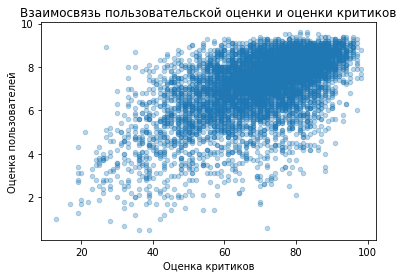

In [20]:
print(df1['critic_score'].corr(df1['user_score']))
df1.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3, title = 'Взаимосвязь пользовательской оценки и оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')

Коэффициент корреляции между данными переменными равен 0,58, что говорит о довольно сильной связи между ними. 

Часть переменной user_score со старыми играми не имеют оценки (значение tbd), однако одна и та же игра может иметь cхожую оценку на разных платформах. Заменим часть пропущенных переменных.

In [21]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [22]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [23]:
df['user_score']=df['user_score'].replace('tbd',np.nan).astype('float64')

In [24]:
df['user_score'] = df['user_score'].fillna(df.groupby('name')['user_score'].transform('median'))

In [25]:
df['critic_score'] = df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('median'))

In [26]:
df['user_score'].describe()

count    8689.000000
mean        7.091512
std         1.503294
min         0.000000
25%         6.300000
50%         7.400000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [27]:
df['critic_score'].describe()

count    9098.000000
mean       68.784843
std        14.124159
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Для переменной user_score заменилось более 1000 значений. При замене значения не были смещены, среднее изменилось с 7.125 на 7.09. Не заменившиеся значения заменим на -1. Аналогично поступим и для переменной critic_score. В дальнейшем данная замена не будет учитываться при анализе.

Аналогично были заменены пропуски для critic_score. Среднее сместилось с 68.97 на 68.78.

In [28]:
df['user_score']=df['user_score'].replace(np.nan, -1)

In [29]:
df['critic_score']=df['critic_score'].replace(np.nan, -1)
df['critic_score']=df['critic_score'].astype(int)

In [30]:
df['rating']=df['rating'].replace(np.nan, 'undefined')

Удалим пропущенные переменные для переменной названия и года выпуска игры

In [31]:
df = df.dropna()

Посчитаем суммарное количество проданных копий

In [32]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

При наличии дубликатов удалим значения с одинаковым названием, платформой и жанром.

In [33]:
df = df.drop_duplicates(subset = ['name','platform','genre'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16563 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16563 non-null  object 
 1   platform         16563 non-null  object 
 2   year_of_release  16563 non-null  Int64  
 3   genre            16563 non-null  object 
 4   na_sales         16563 non-null  float64
 5   eu_sales         16563 non-null  float64
 6   jp_sales         16563 non-null  float64
 7   other_sales      16563 non-null  float64
 8   critic_score     16563 non-null  int64  
 9   user_score       16563 non-null  float64
 10  rating           16563 non-null  object 
 11  total_sales      16563 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


### Вывод <a id="conc1"></a>

В данном пункте были выполнены следующие шаги:
* Был изменен тип данных для year_of_release, user_score, critic_score
* Частично заменены пропуски в переменных user_score, critic_score, rating
* Заменены названия столбцов на нижний регистр
* Создана переменная суммарных продаж по миру
* Удалены пропуски в названии игр, а также для года выпуска игры

## Шаг 3. Анализ данных <a id="analysis"></a>

#### Количество выпущенных игр по годам  <a id="quant"></a>

Рассмотрим количество выпущенных игр по годам

Можно заметить, что с 1980 до 2010 года в среднем наблюдался рост количества выпущенных игр, однако после 2010 года показатель стал снижаться. Пик пришелся на 2007-2010 гг. 
Для последующего анализа рассмотрим данные с 1998 года, когда рынок начал свое стремительное развитие.

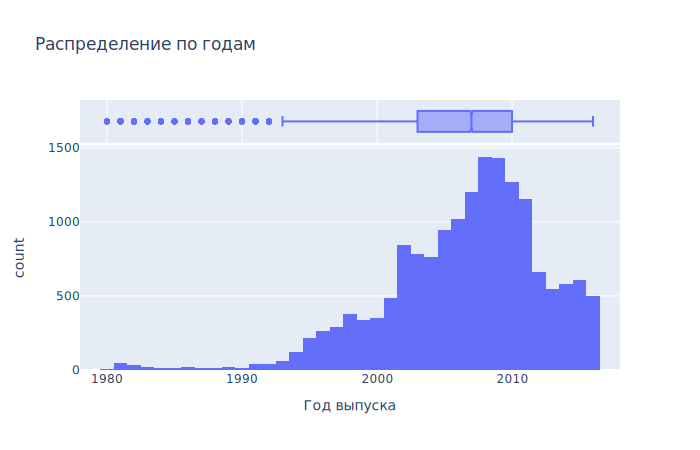

In [35]:
fig = px.histogram(df, x = 'year_of_release', marginal = 'box' , title = 'Распределение по годам',labels={
                     "year_of_release": "Год выпуска"})
fig.show()

Можно заметить, что с 1980 до 2010 года в среднем наблюдался рост количества выпущенных игр, индустрия до 94-95 года только-только начинала свое развитие, видим что где-то с 2001-2002 произошел скачок в 2 раза и после шло стремительное развитие вплоть до 2008-2010 года, после произошел спад, видимо из-за развития мобильной индустрии. 
Для последующего анализа рассмотрим данные с 1998 года, когда рынок начал свое стремительное развитие.

In [36]:
df = df[df['year_of_release']>=1998]

#### Изменение продаж по платформам <a id="change"></a>

Выберем 10 популярных платформ, чтобы определить время их существования.

In [37]:
data_pivot1 = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc ='sum')
display(data_pivot1.sort_values(by ='total_sales',ascending = False).head(10))

,total_sales
platform,
PS2,1247.16
X360,965.36
PS3,934.70
Wii,903.31
DS,804.26
PS,454.72
PS4,314.14
GBA,313.73
PSP,293.57


In [38]:
lst = ['PS2','X360','PS3','Wii', 'DS','PS','PS4','GBA','PSP','3DS']

In [39]:
max_sales= df[df['platform'].isin(lst)]

In [40]:
max_pivot = max_sales.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc ='sum')
display(max_pivot)

total_sales
platform year_of_release             
3DS      2010                    0.32
         2011                   63.20
         2012                   51.76
         2013                   56.57
         2014                   43.76
...                               ...
X360     2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[94 rows x 1 columns]

In [41]:
m=max_sales.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

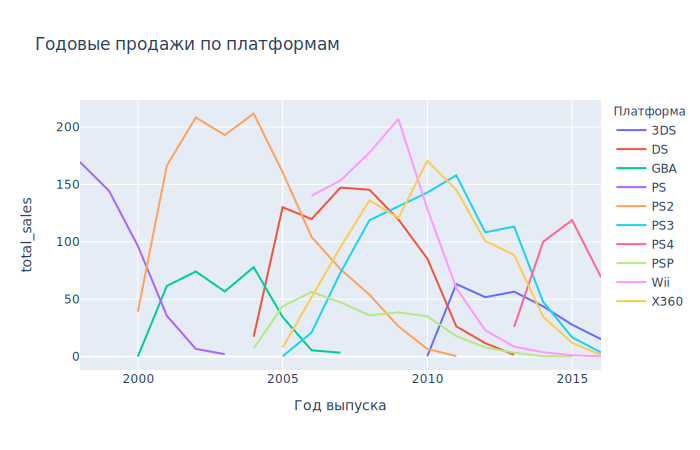

In [42]:
fig=px.line(m,x="year_of_release", y="total_sales",color='platform', title='Годовые продажи по платформам',labels={"year_of_release": "Год выпуска",'value':'Количество проданных копий за год','platform':'Платформа'})
fig.show()

In [43]:
d=df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max']).reset_index()
d=d.droplevel(1, axis=1)

In [44]:
d['diff']=d['max']-d['min']

In [45]:
d['diff'].describe()

count    23.000000
mean      6.565217
std       4.357085
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      18.000000
Name: diff, dtype: float64

Исходя из графика можно сделать вывод, что платформы с наибольшими продажами исчезли, или уменьшилось количество игр на данных платформах к 2016 году. Так, для PSP, PS, PS2, GBA, DS к 2016 году игры не продавались.

Большинство платформ были актуальны для пика игр в 2007-2010 гг. Новая платформа набирает популярность за 1-2 года. 
* 3DS существует с 2011 года. На момент 2016 года продажи игр на данной платформе еще актуальны.
* DS просуществовала с 2004 по 2013 год (9 лет) с пиком продаж в 2007 году.
* GBA: продажи на данной платформе длились с 2000 по 2007 год (7 лет).
* PS2 просуществовала 11 лет (2000 - 2011 год)
* PS3: продажи на данной платформе были актуальны на 2016 год, однако достигли своего минимума с 2006 года.
* PS4: является самой актуальной платформой по продажам на 2016 год, на тот момент платформа существовала уже 3 года.
* PSP прекратились продажи в 2015 году, платформа существовала в течение 11 лет.
* Wii также имела продажи в 2016 году, однако достигла минимальных значений за все время (10 лет)
* X360 продажи с 2005 по 2016 год.

Можно сделать вывод, что в среднем платформы существуют около 6-7 лет.

Для проведения анализа актуального для последующих лет необходимо рассматривать соответствующий период.

Выберем актуальный период - **ограничим данные 2010 годом.**

In [46]:
df = df[df['year_of_release']>2009]

#### Лидирующие платформы <a id="lead"></a>

Рассмотрим, какие платформы лидируют по продажам. 

In [47]:
display(df.groupby(['platform']).agg({'total_sales': 'sum'}).sort_values(by='total_sales',ascending=False))


,total_sales
platform,
PS3,590.64
X360,553.30
PS4,314.14
3DS,258.53
Wii,225.06
XOne,159.32
DS,124.89
PC,124.74
WiiU,82.19


Наиболее продаваемыми платформами в актуальном периоде являются PS3, X360, PS4, 3DS, Wii и т.д.

Рассмотрим распределение продаж для каждой платформы по годам.

In [48]:
m = df.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).sort_values(by='total_sales',ascending=False)
display(m)

,,total_sales
platform,year_of_release,
X360,2010,170.55
PS3,2011,157.98
X360,2011,145.23
PS3,2010,142.96
Wii,2010,128.67
...,...,...
PS2,2011,0.45
3DS,2010,0.32
PSP,2014,0.24


In [49]:
df2016 = df[df['year_of_release']==2016]
df2016.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


In [50]:
m=df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

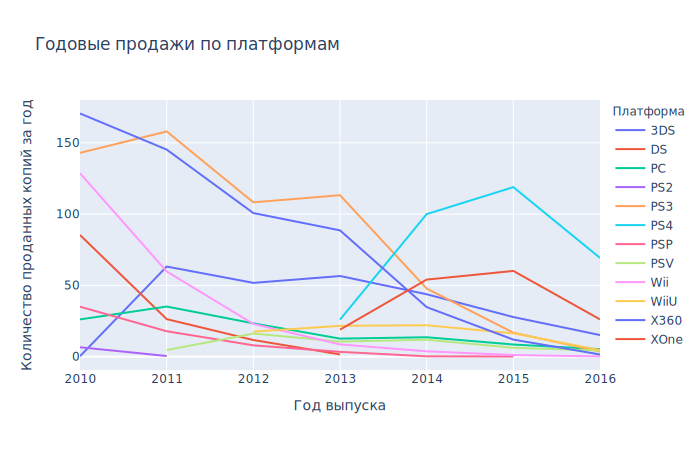

In [51]:
fig=px.line(m,x="year_of_release", y="total_sales",color='platform', title='Годовые продажи по платформам',labels={"year_of_release": "Год выпуска",'total_sales':'Количество проданных копий за год','platform':'Платформа'})
fig.show()

Опираясь на график, можно увидеть, что наибольшие показатели у платформы PS4, однако ее продажи также уменьшились к 2016 году. Большая часть платформ падает в продажах и потеряют свою актуальность после 2017 года.
Это связано с тем, что появляются новые платформы, предыдущие версии теряют актуальность и продажи падают.

Выберем 3 наиболее продаваемые платформы на 2016 год и рассмотрим boxplot по ним

In [52]:
lst = ['PS4', 'XOne','3DS']

In [53]:
max_df= df[df['platform'].isin(lst)]

In [54]:
maxdf = max_df.pivot_table(index=['platform','year_of_release'],values = 'total_sales',aggfunc='sum').reset_index()
display(maxdf)

,platform,year_of_release,total_sales
0,3DS,2010,0.32
1,3DS,2011,63.20
2,3DS,2012,51.76
3,3DS,2013,56.57
4,3DS,2014,43.76
5,3DS,2015,27.78
6,3DS,2016,15.14
7,PS4,2013,25.99
8,PS4,2014,100.00
9,PS4,2015,118.90


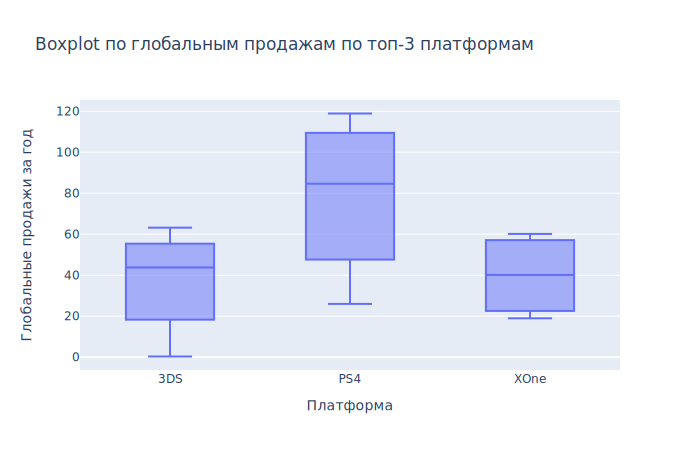

In [55]:
fig = px.box(maxdf,x='platform',y='total_sales', title='Boxplot по глобальным продажам по топ-3 платформам',labels={'platform':'Платформа','total_sales':'Глобальные продажи за год'})
fig.show()

Больший разброс характерен для платформы PS4, медианное значение по продажам достигает 85 миллионов копий. В то время как для 3DS данное значение около 50, а для XOne равно 40 миллионов. Минимальное значение по продажам у 3DS, данный показатель достигается в 2016 году, что указывает на то, что платформа теряет свою популярность и становится не актуальной.

#### Влияние оценки пользователей и критиков на продажи <a id="score"></a>

Рассмотрим на примере платформы PS4 как пользовательская оценка и оценка критиков влияют на продажи игр на данной платформе.

In [56]:
df2 = df[df['user_score'] != -1]

-0.02086201340247838


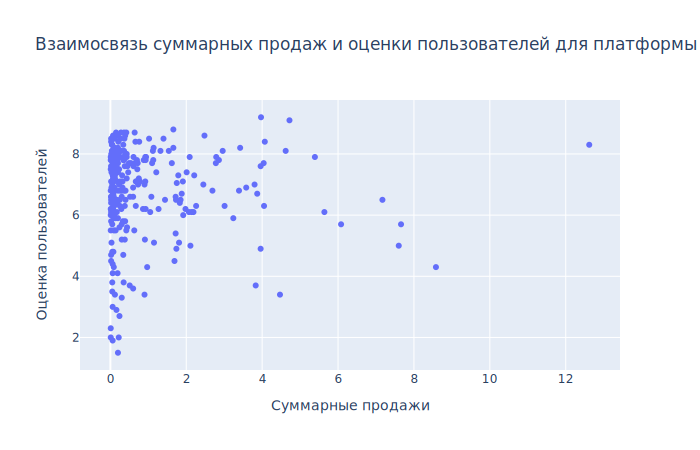

In [57]:
print(df2[df2['platform']=='PS4']['total_sales'].corr(df2['user_score']))

fig=px.scatter(df2[df2['platform']=='PS4'], x="total_sales", y="user_score", title='Взаимосвязь суммарных продаж и оценки пользователей для платформы PS4',labels={'total_sales':'Суммарные продажи','user_score':'Оценка пользователей'})
fig.show()

Для платформы PS4 связи между пользовательской оценкой и количеством проданных копий нет.

In [58]:
df3=df[df['critic_score'] != -1]

0.3913208571925023


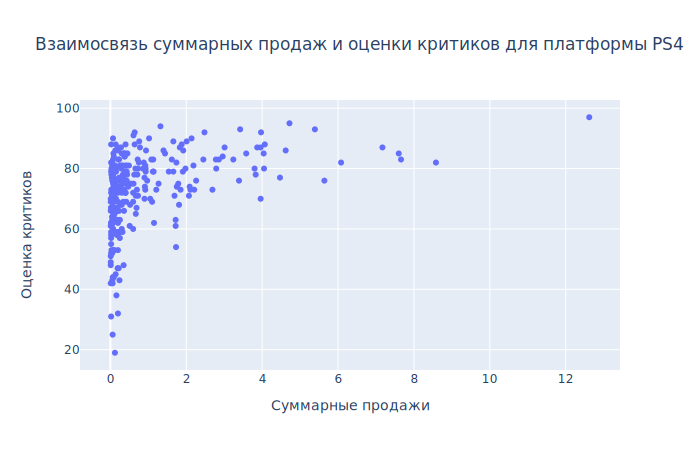

In [59]:
print(df3[df3['platform']=='PS4']['total_sales'].corr(df3['critic_score']))

fig=px.scatter(df3[df3['platform']=='PS4'], x="total_sales", y="critic_score", title='Взаимосвязь суммарных продаж и оценки критиков для платформы PS4',labels={'total_sales':'Суммарные продажи','critic_score':'Оценка критиков'})
fig.show()

Для PS4 коэффициент корреляции между оценкой критиков и продажами равен 0,39, что говорит о наличии связи между переменными. Высокая оценка ведет к увеличению продаж.

Проверим связь с пользовательской оценкой и оценкой критиков на других платформах

-0.09647011599165727


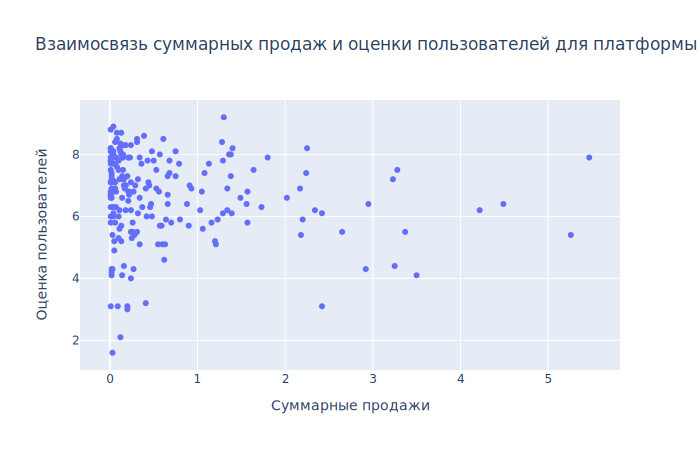

In [60]:
print(df2[df2['platform']=='XOne']['total_sales'].corr(df2['user_score']))
fig=px.scatter(df2[df2['platform']=='XOne'], x="total_sales", y="user_score", title='Взаимосвязь суммарных продаж и оценки пользователей для платформы XOne',labels={'total_sales':'Суммарные продажи','user_score':'Оценка пользователей'})
fig.show()


Для XOne связи между пользовательской оценкой и  продажами не найдено.

0.3756153285106595


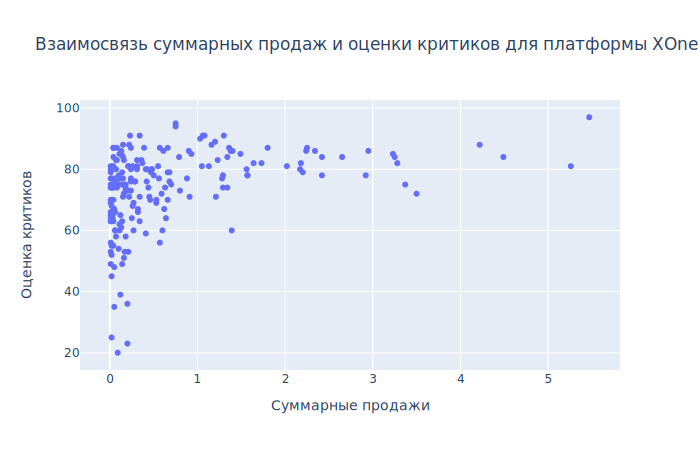

In [61]:
print(df3[df3['platform']=='XOne']['total_sales'].corr(df3['critic_score']))

fig=px.scatter(df3[df3['platform']=='XOne'], x="total_sales", y="critic_score", title='Взаимосвязь суммарных продаж и оценки критиков для платформы XOne',labels={'total_sales':'Суммарные продажи','critic_score':'Оценка критиков'})
fig.show()

Связь между оценкой критиков и продажами есть, коэффициент корреляции равен 0,37. Оценка положительно влияет на продажи.

0.23148275320920395


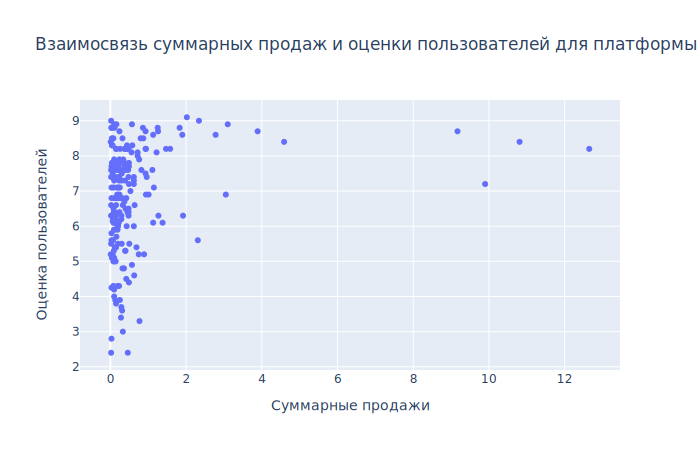

In [62]:
print(df2[df2['platform']=='3DS']['total_sales'].corr(df2['user_score']))

fig=px.scatter(df2[df2['platform']=='3DS'], x="total_sales", y="user_score", title='Взаимосвязь суммарных продаж и оценки пользователей для платформы 3DS',labels={'total_sales':'Суммарные продажи','user_score':'Оценка пользователей'})
fig.show()

Для 3DS есть связь между оценкой пользователей и продажами, но не сильная. Высокая оценка способна увеличить продажи игр на данной платформе.

0.32071097954270394


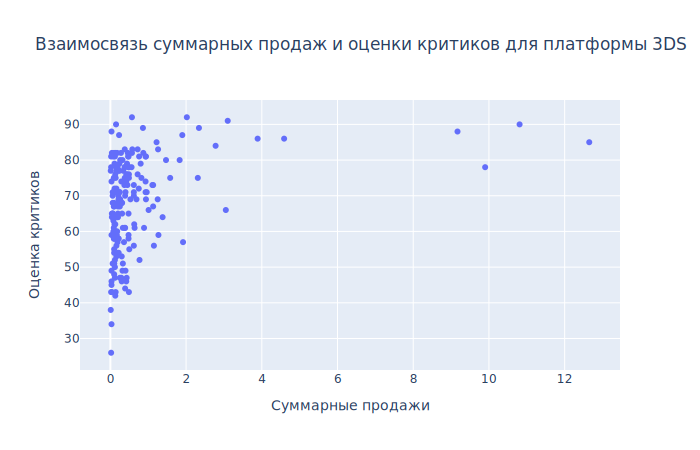

In [63]:
print(df3[df3['platform']=='3DS']['total_sales'].corr(df3['critic_score']))
fig=px.scatter(df3[df3['platform']=='3DS'], x="total_sales", y="critic_score", title='Взаимосвязь суммарных продаж и оценки критиков для платформы 3DS',labels={'total_sales':'Суммарные продажи','critic_score':'Оценка критиков'})
fig.show()

Для 3DS связь между продажами и оценкой критиков существует. Коэффициент корреляции равен 0,32.

Мы видим, что продажи в лучшей степени взаимодействуют с оценками критиков, нежели с оценками пользователей, но коэф. варьируются от платформы к платформе, посмотрим на общую тенденцию:

In [64]:
df.query('critic_score != -1 and user_score != -1')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.490400,0.292795
user_score,0.490400,1.000000,0.051424
total_sales,0.292795,0.051424,1.000000


Тенденция сохраняется


#### Распределение игр по жанрам <a id="genre"></a>

Рассмотрим распределение игр по жанрам.

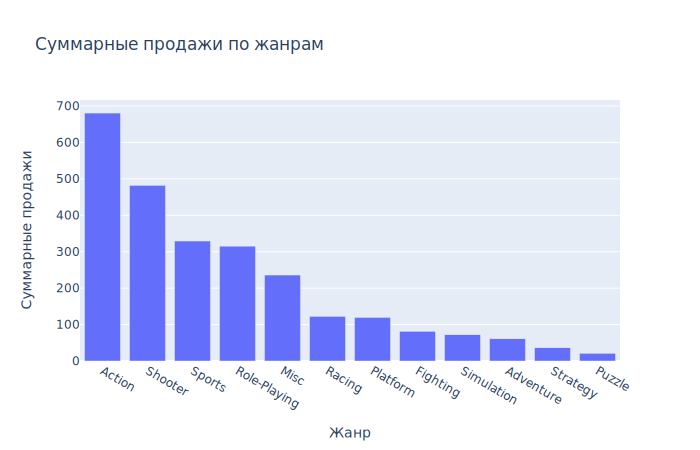

In [65]:
fig = px.bar(df.pivot_table('total_sales',index='genre',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False),x='genre',y='total_sales', title="Суммарные продажи по жанрам",labels={'total_sales':'Суммарные продажи',"genre":'Жанр'})
fig.show()

In [66]:
display(df.pivot_table('total_sales',index='genre',aggfunc='sum').sort_values(by='total_sales',ascending=True))

,total_sales
genre,
Puzzle,21.22
Strategy,36.36
Adventure,61.00
Simulation,72.05
Fighting,81.59
Platform,119.72
Racing,122.60
Misc,236.00
Role-Playing,315.33


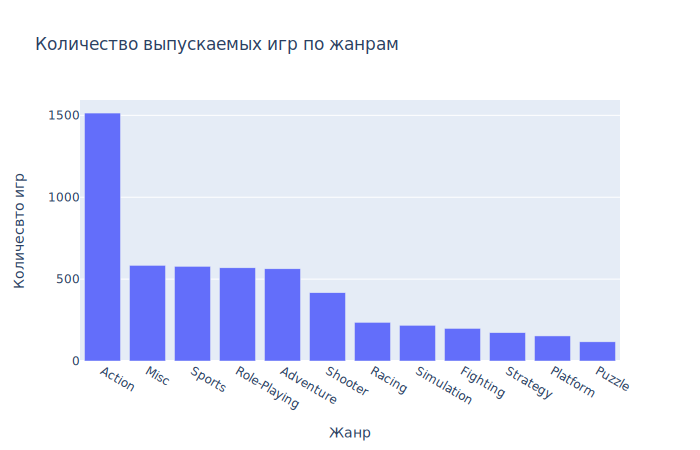

In [67]:
fig = px.bar(df.pivot_table('name',index='genre',aggfunc='count').reset_index().sort_values(by='name',ascending=False),x='genre',y='name', title="Количество выпускаемых игр по жанрам",labels={'name':'Количесвто игр',"genre":'Жанр'})
fig.show()


Самыми продаваемыми жанрами являются Action, Shooter, Sports, Role-playing. Остальные жанры несильно отличаются по продажам между собой. Наибольшее количество игр также выходит в жанре Action, среди остальных жанров сильных отличий нет.

### Вывод <a id="conc2"></a>

На данном этапе были проанализированы платформы. На основе самых продаваемых была установлена продолжительность их существования (6-7 лет). За актуальный выбран период с 2010 года.Также были выделены платформы, которые будут актуальны на 2017 год на основе продаж.

Проанализировали, насколько пользовательская оценка и оценка критиков влияет на продажи для самых продаваемых платформ. Для 2 из 3х платформ на продажи влияет только оценка критиков, для платформы 3DS влияют оба показателя. Однако платформа 3DS имеет самые низкие показатели по продажам в 2016 году, что говорит о том, что ее актуальность снижается.

Среди жанров больше всего выделяются Action, Shooter и Role-playing. Остальные жанры не отличаются в показателях продаж между собой.

## Шаг 4. Портрет пользователя каждого региона <a id="portret"></a>

### Топ-5 платформ для каждого региона <a id="platf"></a>

Рассмотрим самые популярные платформы (топ-5) и рассчитаем доли продаж для каждого региона.

#### Северная Америка <a id="NA1"></a>

In [68]:
na = df.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na['ratio'] = na['na_sales']/df['na_sales'].sum()*100
na['ratio']=na['ratio'].round(2)
display(na)


,na_sales,ratio
platform,,
X360,335.93,29.53
PS3,230.47,20.26
Wii,122.68,10.79
PS4,108.74,9.56
XOne,93.12,8.19


#### Европа <a id="EU1"></a>

In [69]:
eu = df.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu['ratio'] = eu['eu_sales']/df['eu_sales'].sum()*100
eu['ratio']=eu['ratio'].round(2)
display(eu)

,eu_sales,ratio
platform,,
PS3,214.73,25.38
X360,164.29,19.41
PS4,141.09,16.67
PC,70.44,8.32
Wii,66.35,7.84


#### Япония <a id="JP1"></a>

In [70]:
jp = df.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp['ratio'] = jp['jp_sales']/df['jp_sales'].sum()*100
jp['ratio']=jp['ratio'].round(2)
display(jp)

,jp_sales,ratio
platform,,
3DS,100.64,32.94
PS3,59.36,19.43
PSP,42.44,13.89
DS,27.90,9.13
PSV,21.84,7.15


Платформы-лидеры по продажам различаются в Северной Америке, Европе и Японии. Для Северной Америки лидером является X360, более 29% продаж принадлежат играм на данной платформе. В Европе это PS3 с долей продаж в 25%, а в Японии 3DS с 33%. 

Северная Америка и Европа имеют практически одинаковые платформы в топ-5, однако результаты с Японией различаются. Лидер Японии 3DS не входит в пятерку самых продаваемых платформ, также в Европе и Северной Америке менее популярны PSP, DS, PSV.

### Топ-5 жанров для каждого региона <a id="genre"></a>

Рассмотрим самые популярные жанры (топ-5) и рассчитаем доли продаж для каждого региона.

#### Северная Америка <a id="NA2"></a>

In [71]:
na = df.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na['ratio'] = na['na_sales']/df['na_sales'].sum()*100
na['ratio']=na['ratio'].round(2)
display(na)

,na_sales,ratio
genre,,
Action,294.26,25.87
Shooter,238.50,20.97
Sports,157.49,13.85
Misc,124.39,10.94
Role-Playing,112.05,9.85


#### Европа <a id="EU2"></a>

In [72]:
eu = df.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu['ratio'] = eu['eu_sales']/df['eu_sales'].sum()*100
eu['ratio']=eu['ratio'].round(2)
display(eu)

,eu_sales,ratio
genre,,
Action,236.70,27.97
Shooter,172.57,20.39
Sports,117.08,13.84
Role-Playing,75.48,8.92
Misc,66.55,7.86


#### Япония <a id="JP2"></a>

In [73]:
jp = df.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp['ratio'] = jp['jp_sales']/df['jp_sales'].sum()*100
jp['ratio']=jp['ratio'].round(2)
display(jp)

,jp_sales,ratio
genre,,
Role-Playing,103.59,33.91
Action,72.21,23.64
Misc,24.54,8.03
Platform,15.81,5.17
Adventure,15.67,5.13


Отличаются результаты Японии от Европы и Северной Америки и относительно жанров. Самым популярным жанром для Америки и Европы является Action, продажи игр в данном жанре занимают 26% и 28% соответственно от суммарных продаж в регионах. В Японии Action занимает второе место, наиболее востребованным жанром является Role-playing, который для Америки и Европы в топ-5 занимает лишь 5 и 4 места. 

Северная Америка и Европа также в топ-5 имеют одинаковые жанры, в то время как только в Японии в топ-5 входят жанры Platform и Adventure.

### Влияние рейтинга ESRB  на продажи по регионам
<a id="esrb"></a>

Рассмотрим, влияет ли рейтинг ESRB на продажи по регионам.

In [74]:
df4=df[df['rating'] != 'undefined']

#### Северная Америка <a id="NA3"></a>

In [75]:
na = df4.pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na['ratio'] = na['na_sales']/df4['na_sales'].sum()*100
na['ratio']=na['ratio'].round(2)
display(na)

,na_sales,ratio
rating,,
M,384.23,39.16
E,272.93,27.82
E10+,161.61,16.47
T,161.21,16.43
EC,1.13,0.12


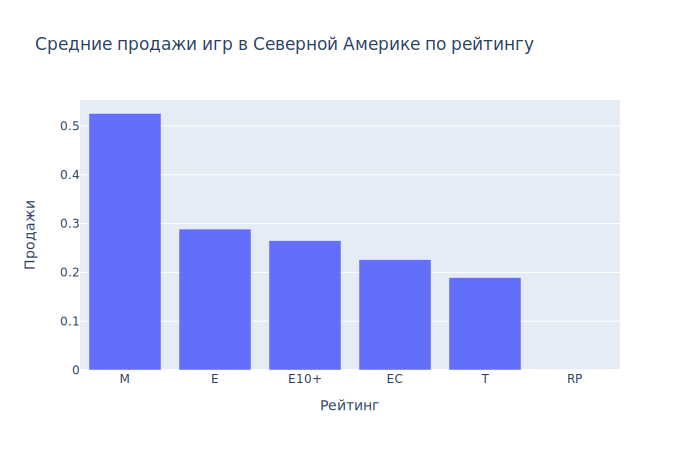

In [76]:
fig = px.bar(df4.pivot_table('na_sales',index='rating',aggfunc='mean').reset_index().sort_values(by='na_sales',ascending=False),x='rating',y='na_sales',title='Средние продажи игр в Северной Америке по рейтингу',labels={'na_sales':'Продажи',"rating":'Рейтинг'})
fig.show()

#### Европа <a id="EU3"></a>

In [77]:
eu = df4.pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu['ratio'] = eu['eu_sales']/df4['eu_sales'].sum()
display(eu)

,eu_sales,ratio
rating,,
M,294.29,0.416440
E,197.97,0.280141
T,113.23,0.160228
E10+,101.16,0.143148
RP,0.03,0.000042


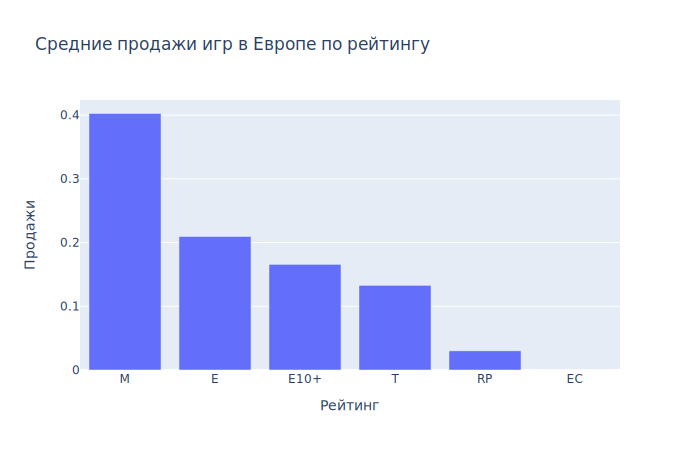

In [78]:
fig = px.bar(df4.pivot_table('eu_sales',index='rating',aggfunc='mean').reset_index().sort_values(by='eu_sales',ascending=False),x='rating',y='eu_sales',title='Средние продажи игр в Европе по рейтингу',labels={'eu_sales':'Продажи',"rating":'Рейтинг'})
fig.show()

#### Япония <a id="JP3"></a>

In [79]:
jp = df4.pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp['ratio'] = jp['jp_sales']/df4['jp_sales'].sum()
display(jp)

,jp_sales,ratio
rating,,
E,47.87,0.358040
T,42.14,0.315183
M,30.47,0.227898
E10+,13.22,0.098878
EC,0.00,0.000000


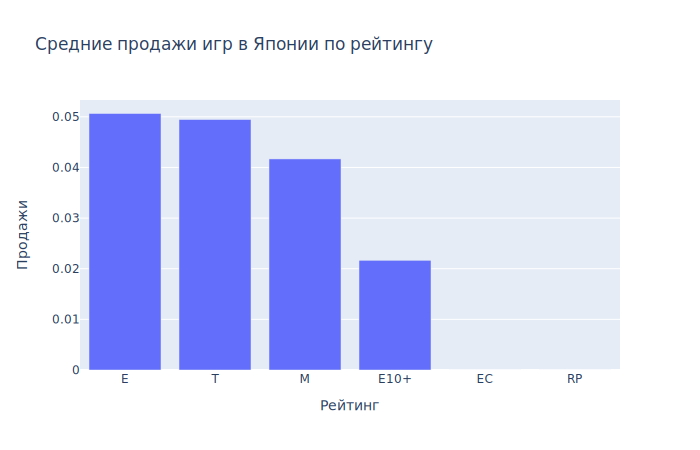

In [80]:
fig = px.bar(df4.pivot_table('jp_sales',index='rating',aggfunc='mean').reset_index().sort_values(by='jp_sales',ascending=False),x='rating',y='jp_sales',title='Средние продажи игр в Японии по рейтингу',labels={'jp_sales':'Продажи',"rating":'Рейтинг'})
fig.show()

Выпуск игры с определенным рейтингом может увеличить продажи в Северной Америке и Европе. Так, игры с рейтингом M,E ('от 17 лет', 'Для всех') существенно отличаются по продажам по сравнению с продажами игр с другими рейтингами. В Японии при рассмотрении суммарных показателей продаж, можно увидеть, что в среднем продажи игр с разными рейтингами значительно не отличаются. Самыми непопулярными являются рейтинги EC и RP во всех регионах. Вкусовые предпочтения по жанрам отразились и на рейтингах, Америка и Европа любит больше жестокие игры, нежели Япония

### Вывод <a id="conc4"></a>

Можно сделать вывод, что для Северной Америки и Европы топ-5 платформ практически идентичны (X360, PS3,PS4, Wii), однако топ-5 Японии отличается от других регионов (3DS, PS3, PSP). Аналогичная ситуация для топ-5 жанров, популярные жанры Японии (Role-Playing, Action, Misc) не совпадает с Северной Америкой и Европой (Action, Shooter,Sports). 

Игры с рейтингом M,E отличаются в продажах от остальных для Европы и Америки, но в Японии в среднем продажи игр с разным рейтингом не отличаются между собой.

## Шаг 5. Проверка гипотез <a id="hypothesis"></a>

### Гипотеза о равенстве средних пользовательских оценок платформ Xbox One и PC <a id="hypoth1"></a>

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

H0: Средние пользовательские рейтинги платформ равны

H1: Средние пользовательские рейтинги платформ не равны

Уровень значимости задаем равным 0.05

In [81]:
df_xbox = df2[df2['platform']=='XOne']

In [82]:
df_pc = df2[df2['platform']=='PC']

In [83]:
import scipy.stats as stats

Сравним дисперсии двух выборок

In [84]:
np.var(df_xbox['user_score'])

1.884496712696766

In [85]:
np.var(df_pc['user_score'])

2.4333922918828166

Можно сделать вывод, что дисперсии выборок отличаются более, чем на 5%, то есть отличие значимо. Поэтому выбираем критерий equal_var = False.

Проверим выборки на нормальность

In [86]:
stats.shapiro(df_xbox['user_score'])

ShapiroResult(statistic=0.950167179107666, pvalue=1.4204860008248943e-06)

In [87]:
stats.shapiro(df_pc['user_score'])

ShapiroResult(statistic=0.9450048208236694, pvalue=7.864791456979603e-11)

Можем сделать вывод, что распределение выборок не нормальное, поэтому лучше использовать критерий Манна-Уитни.

Проверим гипотезу через t-критерий Стьюдента и критерий Манна-Уитни.

In [88]:
from scipy import stats as st
import numpy as np
alpha = .05 
results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'],equal_var = False)

In [89]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4216795904864714
Не получилось отвергнуть нулевую гипотезу


In [90]:
from scipy.stats import mannwhitneyu

In [91]:
stat, p = mannwhitneyu(df_xbox['user_score'], df_pc['user_score'])
alpha = .05
print('Статистика:', stat,'p-value:',p)

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Статистика: 39567.0 p-value: 0.40111881649860415
Не получилось отвергнуть нулевую гипотезу


В обоих случаях не можем отвергнуть нулевую гипотезу на 5% уровне о равенстве средних пользовательских оценках платформ XBox и PC.

В ходе теста, мы получили высокое p-значение. Можно сделать вывод, что пользовательские оценки по платформам XOne PC конечно же имеют различия, но получить такие различия с вероятностью  94% можно случайно. Это слишком высокая вероятность случайности, чтобы отвергать гипотезу Но, учитывая что мы поставили порог 5%. Таким образом делаем вывод, что оценки по выбранным платформам схожи, а если различия и имеются, то они статистически незначимы.


### Гипотеза о равенстве средних пользовательских оценок для жанров Action и Sports <a id="hypoth2"></a>

Проверим гипотезу, что средние пользовательские оценки жанров Action и Sports одинаковые:

H0: Средние пользовательские рейтинги жанров равны

H1: Средние пользовательские рейтинги жанров не равны

Уровень значимости задаем равным 0.05

In [92]:
df_action = df2[df2['genre']=='Action']

In [93]:
df_sport = df2[df2['genre']=='Sports']

Рассмотрим дисперсии двух выборок.

In [94]:
np.var(df_action['user_score'])

1.8158367651468355

In [95]:
np.var(df_sport['user_score'])

2.7619713692419645

Дисперсии отличаются более, чем на 5%, поэтому выбираем критерий False.

In [96]:
stats.shapiro(df_action['user_score'])

ShapiroResult(statistic=0.9346195459365845, pvalue=1.0981304722842196e-19)

In [97]:
stats.shapiro(df_sport['user_score'])

ShapiroResult(statistic=0.9613195657730103, pvalue=1.4319115670957672e-08)

Также можно сказать о не нормальном распределении выборок, поэтому проверим гипотезу через t-критерий Стьюдента и критерий Манна-Уитни.

In [98]:
alpha = .05 
results = st.ttest_ind(df_action['user_score'], df_sport['user_score'], equal_var = False)

In [99]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.2903938741478596e-19
Отвергаем нулевую гипотезу


In [100]:
stat, p = mannwhitneyu(df_action['user_score'], df_sport['user_score'])
alpha = .05
print('Статистика:', stat,'p-value:',p)

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Статистика: 119955.5 p-value: 2.417000809250973e-21
Отвергаем нулевую гипотезу


В обоих случаях отвергаем нулевую гипотезу на 5% уровне о том, что пользовательские оценки среди жанров Action и Sports одинаковые.

В ходе теста мы получили очень малое p-значение. Делаем вывод, что средние пользовательские рейтинги по жанрам Action и Sport имеют статистически значимые различия.


### Вывод <a id="conc3"></a>

Проверили гипотезы о равенстве средних пользовательских оценок для платформ Xbox One и PC, а также жанров Actions и Sports. 

Таким образом, средние пользовательские оценки для платформ Xbox One и PC равны на 5% уровне значимости, в то время как для жанров Action и Sports они разные также на 5% уровне.

## Шаг 5. Общий вывод <a id="conclusion"></a>

На основе полученных результатов, можем сделать вывод, что рынок компьютерных игр постоянно развивается. Существует большое количество платформ, они быстро появляются и развиваются за 1-2 года, однако в среднем они актуальны не более 7 лет. Поэтому для анализа и прогнозирования рынка игр необходимо постоянно использовать актуальные данные. 

На продажи игр в основном влияют оценки критиков, для самых продаваемых платформ 2016 года PS4, XOne оценки пользователей не оказывают влияние, в то время как для 3DS оба показателя сказывались на продажах. Однако к 2016 году данная платформа имеет один из самых низких показателей по продажам за все время, что говорит о том, что на 2017 год и далее она не будет самой актуальной.

Среди жанров больше всего выделяются Action, Shooter и Role-playing. Остальные жанры не отличаются в показателях продаж между собой.

Также можно говорить о том, что показатели Северной Америки и Европы схожи как в предпочтении платформ, так и жанров, Япония отличается по обоим показателям. Игры с рейтингом M,E отличаются в продажах от остальных для Европы и Америки, но в Японии в среднем продажи игр с разным рейтингом не отличаются между собой.

На основании построенных гипотез, можно сделать вывод, что пользовательские оценки не отличаются на выбранных платформах. Поскольку одна и та же игра может выходить на разных платформах, то пользователи оценивают в большей степени игру, а не саму платформу, поэтому можно говорить о том, что оценки могут быть равны. Если говорить о жанрах, то оценки пользователей отличаются среди жанров Action и Sports. На это могут влиять личные предпочтения пользователей, а также разные показатели самих игр.
